In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.model_zoo import load_url

In [2]:
class AlexNet(nn.Module):
    
    def __init__(self):
        super(AlexNet, self).__init__()
        self.n_input = 3
        self.n_output = 1000
        self.features = nn.Sequential(
            nn.Conv2d(self.n_input, 64, kernel_size=11, stride=4, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Conv2d(64, 192, kernel_size=5, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Conv2d(192, 384, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(384, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
        )
        self.avgpool = nn.AdaptiveAvgPool2d((6, 6))
        self.classifier = nn.Sequential(
            nn.Dropout(),
            nn.Linear(256 * 6 * 6, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Linear(4096, self.n_output),
            nn.Softmax(dim=1)
        )

    def forward(self, x):
        x = self.features(x)
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x

In [3]:
def alexnet():
    model = AlexNet()
    model.load_state_dict(load_url('https://download.pytorch.org/models/alexnet-owt-4df8aa71.pth'))
    return model

In [4]:
net = alexnet().float()

Downloading: "https://download.pytorch.org/models/alexnet-owt-4df8aa71.pth" to /root/.cache/torch/checkpoints/alexnet-owt-4df8aa71.pth
100.0%


In [5]:
import json
class_idx = json.load(open('imagenet_class_index.json'))
idx2label = [class_idx[str(k)][1] for k in range(len(class_idx))]

from PIL import Image
import numpy as np
image = Image.open('images/1.jpg')
pixel = torch.from_numpy(np.expand_dims(np.array(image).transpose((2, 0, 1))[0:3] / 255.0, 0))

In [6]:
idx2label[torch.argmax(net(pixel.float())).item()]

'Egyptian_cat'

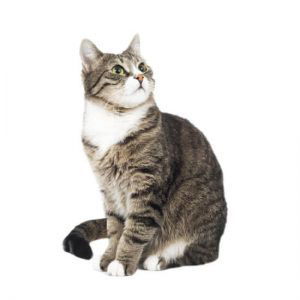

In [7]:
image